In [21]:
# import spacy


# nlp = spacy.load("en_core_web_sm-3.7.1")

# def find_sentences_about_same_person(text):
#     doc = nlp(text)
    
#     # Iterate over each sentence in the document
#     for sentence in doc.sents:
#         # Initialize variables to keep track of the subject(s) and their associated subsentences
#         subjects = []
#         subsentences = []
        
#         # Iterate over each token in the sentence
#         for token in sentence:
#             # Check if the token is a subject
#             if token.dep_ == "nsubj":
#                 # Add the subject to the list of subjects
#                 subjects.append(token)
#                 # Initialize a list to store tokens in the subsentence
#                 subsentence = [token]
#                 # Iterate over the subtree of the subject token to extract the subsentence
#                 for descendant in token.subtree:
#                     # Append each token in the subtree to the subsentence
#                     subsentence.append(descendant)
#                 # Add the subsentence to the list of subsentences
#                 subsentences.append(subsentence)
        
#         # If there is more than one subject and all subjects refer to the same person,
#         # print the sentence along with its subsentences
#         if len(subjects) > 1 and all(subjects[0].text == subj.text for subj in subjects[1:]):
#             print("Sentence:", sentence)
#             print("Subsentences:")
#             for subsentence in subsentences:
#                 print(" ".join(token.text for token in subsentence))
#             print()

# # Example text
# text = "Anna used to be a teacher like her father, but now she wants to change her job. Her father, John, was a teacher as well. Anna's sister, Emma, is a doctor."

# # Find sentences with multiple subsentences all referring to the same person
# find_sentences_about_same_person(text)


In [2]:
import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_sm-3.7.1")

def visualize_dependency_tree(text):
    doc = nlp(text)
    for sentence in doc.sents:
        displacy.render(sentence, style="dep", jupyter=True, options={"compact": True, "distance": 90})


# text = "Anna used to be a teacher like her father, but now she wants to change her job. Her father, John, was a teacher as well. Anna's sister, Emma, is a doctor."
# text = "Anna used to be a teacher like her father, but now she wants to change her job."
text = "walter extra is a german award-winning aerobatic pilot , chief aircraft designer and founder of extra flugzeugbau -lrb- extra aircraft construction -rrb- , a manufacturer of aerobatic aircraft .\nextra was trained as a mechanical engineer .\nhe began his flight training in gliders , transitioning to powered aircraft to perform aerobatics .\nhe built and flew a pitts special aircraft and later built his own extra ea-230 .\nextra began designing aircraft after competing in the 1982 world aerobatic championships .\nhis aircraft constructions revolutionized the aerobatics flying scene and still dominate world competitions .\nthe german pilot klaus schrodt won his world championship title flying an aircraft made by the extra firm .\nwalter extra has designed a series of performance aircraft which include unlimited aerobatic aircraft and turboprop transports .\n'"
text = 'Antoine Bosselut is an assistant professor in the School of Computer and Communication Sciences at the École Polytechnique Fédéral de Lausanne (EPFL), He was a postdoctoral scholar at Stanford University and a Young Investigator at the Allen Institute for AI (AI2). He completed his PhD at the University of Washington and was a student researcher at Microsoft Research. His research interests are in building systems that mix knowledge and language representations to solve problems in NLP, specializing in commonsense representation and reasoning.'
text = text.replace('.',',')
text = text + 'Emily as his sister was great, and she was angry'
text = 'sir william laird clowes -lrb- 1 february 1856 -- 14 august 1905 -rrb- was a british journalist'
text = 'shlomo yosef burg -lrb- , 31 january 1909 - 15 october 1999 -rrb- was a german-born israeli politician'

visualize_dependency_tree(text)


In [7]:
# nested SVA in the literature (relative or independant clause is in between the main subject and the main verb)
text1 = 'The keys that the man near the cabinet holds are missing.'
text2 = 'The book that the students who failed the exam had to read was difficult.'
visualize_dependency_tree(text1)
visualize_dependency_tree(text2)

____
____

In [38]:
text = "Anna used to be a teacher like her father, but now she wants to change her job. Her father, John, was a teacher as well. Anna's sister, Emma, is a doctor."
doc = nlp(text)

for sent in doc.sents:
    for token in sent:
        print(token, '--->', token.dep_)
        # for an in token.head.ancestors:
        #     print(token, '+++>', an.pos_)
    break

Anna ---> nsubj
used ---> ROOT
to ---> aux
be ---> xcomp
a ---> det
teacher ---> attr
like ---> prep
her ---> poss
father ---> pobj
, ---> punct
but ---> cc
now ---> advmod
she ---> nsubj
wants ---> conj
to ---> aux
change ---> xcomp
her ---> poss
job ---> dobj
. ---> punct


In [58]:
doc = nlp("Anna used to be a teacher like her father, but now she wants to change her job.")
pool = []

for sent in doc.sents:
    if 'nsubj' in [token.dep_ for token in sent]:
        pool.append(sent)

In [59]:
pool

[Anna used to be a teacher like her father, but now she wants to change her job.]

In [63]:
with open("Sorcerer's Stone.txt", 'r') as f:
    stone = f.read()

doc = nlp(stone)
pool = []

for sent in doc.sents:
    if 'nsubj' in [token.dep_ for token in sent]:
        pool.append(sent)

In [66]:
pool[2]

Mr. Dursley was the director of a firm called Grunnings, which made
drills.

In [82]:
text = "Anna used to be a teacher like her father, but now she wants to change her job."
doc = nlp(text)
visualize_dependency_tree(text)

for token in doc:
    print(token.text, token.dep_, token.head.text, token.head.pos_,
            [child for child in token.children])

Anna nsubj used VERB []
used ROOT used VERB [Anna, be, ,, but, wants]
to aux be AUX []
be xcomp used VERB [to, teacher]
a det teacher NOUN []
teacher attr be AUX [a, like]
like prep teacher NOUN [father]
her poss father NOUN []
father pobj like ADP [her]
, punct used VERB []
but cc used VERB []
now advmod wants VERB []
she nsubj wants VERB []
wants conj used VERB [now, she, change, .]
to aux change VERB []
change xcomp wants VERB [to, job]
her poss job NOUN []
job dobj change VERB [her]
. punct wants VERB []


In [83]:
text = "Anna used to be a teacher like her father, but Alex is a bad guy."
doc = nlp(text)
visualize_dependency_tree(text)

for token in doc:
    print(token.text, token.dep_, token.head.text, token.head.pos_,
            [child for child in token.children])

Anna nsubj used VERB []
used ROOT used VERB [Anna, be, ,, but, is]
to aux be AUX []
be xcomp used VERB [to, teacher]
a det teacher NOUN []
teacher attr be AUX [a, like]
like prep teacher NOUN [father]
her poss father NOUN []
father pobj like ADP [her]
, punct used VERB []
but cc used VERB []
Alex nsubj is AUX []
is conj used VERB [Alex, guy, .]
a det guy NOUN []
bad amod guy NOUN []
guy attr is AUX [a, bad]
. punct is AUX []


In [89]:
text = "Autonomous cars shift insurance liability toward manufacturers"
doc = nlp(text)
visualize_dependency_tree(text)

for token in doc:
    print(token.text, token.dep_, token.head.text, token.head.pos_,
            [child for child in token.children])

Autonomous amod cars NOUN []
cars nsubj shift VERB [Autonomous]
shift ROOT shift VERB [cars, liability, toward]
insurance compound liability NOUN []
liability dobj shift VERB [insurance]
toward prep shift VERB [manufacturers]
manufacturers pobj toward ADP []


In [98]:
# Finding a verb with a subject from below — good
verbs = set()
for possible_subject in doc:
    if possible_subject.dep_ == 'nsubj' and possible_subject.head.pos_ == 'VERB':
        verbs.add(possible_subject.head)
print(verbs)

{shift}


___
May 29: CM investigation
___

In [11]:
import pandas as pd
import torch
import matplotlib.pyplot as plt
import numpy as np
from typing import Literal


def plot_cm(df):
    fig, axes = plt.subplots(2,2,figsize=(10, 8))

    for i, coloumn in enumerate(['attention', 'rollout', 'attentionNorm', 'valueZeroing']):
        if df[f'{coloumn}_cm_all_layers'].isna().all():
            continue
        mean_cueWordsCm_tensor = torch.stack(df[f'{coloumn}_CueWordsCm_all_layers'].tolist(), dim=0).mean(dim=0)
        mean_nonCueWordsCm_mean_tensor = torch.stack(df[f'{coloumn}_nonCueWordsCm_mean_all_layers'].tolist(), dim=0).mean(dim=0)
        mean_nonCueWordsCm_max_tensor = torch.stack(df[f'{coloumn}_nonCueWordsCm_max_all_layers'].tolist(), dim=0).mean(dim=0)
        layers = mean_cueWordsCm_tensor.size(1)
        num_cues = mean_cueWordsCm_tensor.size(0)

        row = i // 2
        col = i % 2

        for c in range(num_cues):
            axes[row, col].bar(range(1, layers + 1), mean_cueWordsCm_tensor[c, :], label=f'cue {c}', linewidth=2)

        axes[row, col].plot(range(1, layers + 1), mean_nonCueWordsCm_mean_tensor, label='a random non cue', linewidth=2, linestyle='--')
        axes[row, col].plot(range(1, layers + 1), mean_nonCueWordsCm_max_tensor, label='max of non cues', linewidth=2, linestyle='--')

        axes[row, col].set_xlabel('Layers', fontsize=14)
        axes[row, col].set_ylabel('Context mixing score', fontsize=14)
        axes[row, col].set_title(f'{coloumn}', fontsize=16)
        axes[row, col].set_xticks(range(1, layers + 1))
        axes[row, col].tick_params(axis='both', which='major', labelsize=12)
        axes[row, col].legend(fontsize=12, loc='upper left')
        axes[row, col].grid(linestyle='--', alpha=0.7)
        axes[row, col].set_facecolor('#f8f8f8')
        fig.patch.set_facecolor('#f8f8f8')
        
    plt.tight_layout()
    plt.show()


def extract_cueWords_cm(cm, cues_tokenIdxes):
    cue_words_cm = []
    num_cues = cues_tokenIdxes.shape[0]
    for c in range(num_cues):
        cue_tokens_cm = cm[:, cues_tokenIdxes[c,0]: cues_tokenIdxes[c,1]]
        cue_word_cm, _ = torch.max(cue_tokens_cm, dim=1)
        cue_words_cm.append(cue_word_cm)
    return torch.stack(cue_words_cm)


def extract_nonCueWords_stats(cm, cues_tokenIdxes, stat: Literal['mean', 'max']):
    cue_idxes = []
    for row in cues_tokenIdxes:
        cue_idxes.extend([i for i in range(row[0], row[1])])
    all_idxes = set(range(cm.size(1)))
    NonCue_idxes = list(all_idxes - set(cue_idxes))
    NonCue_words_cm = cm[:, NonCue_idxes]
    if stat == 'mean':
        return torch.mean(NonCue_words_cm, dim=1)
    elif stat == 'max':
        return torch.max(NonCue_words_cm, dim=1)[0]

## Roberta

### without fine-tuning

#### Examples with 2 cues

In [18]:
df = pd.read_pickle('results/roberta-base_gender_agreement_2.pkl')
print('MASKED TEXT: ', df.iloc[0]['masked_text'])
print('CUE WORDS: ', df.iloc[0]['cue_words'])
print('TARGET WORD: ', df.iloc[0]['target_word'])
print('MODEL PREDICTION: ', df.iloc[0]['model_top1_prediction'])
print('DATAFRAME #ROWS: ', df.shape[0])

MASKED TEXT:  arnold chernushevich -lrb- , 15 january 1933 -- 2 september 1991 -rrb- was a soviet olympic fencer . <mask> won a bronze medal in the team épée event at the 1960 summer olympics .
CUE WORDS:  ['arnold|0|6', 'chernushevich|7|20']
TARGET WORD:  he
MODEL PREDICTION:   He
DATAFRAME #ROWS:  1677


In [16]:
# investigating examples with correct model prediction
equality_condition = (df['target_word'] == df['model_top1_prediction'].astype(str).str.lower()) | (' '+df['target_word'] == df['model_top1_prediction'].astype(str).str.lower())
df_equal = df.loc[equality_condition]
print('DATAFRAME #ROWS: ', df_equal.shape[0])
print('ACCURACY: ', df_equal.shape[0]/df.shape[0] * 100, '%')

DATAFRAME #ROWS:  1572
ACCURACY:  93.73881932021467 %


In [45]:
# add cue_words cm and also mean and max cm of nonCue_words to the resulted dataframe
for cm in ['attention', 'rollout', 'attentionNorm', 'valueZeroing']:
    df_equal[f'{cm}_CueWordsCm_all_layers'] = df_equal.apply(
        lambda row: extract_cueWords_cm(row[f'{cm}_cm_all_layers'], row['cues_tokenIdxes']), 
        axis=1
    )

    df_equal[f'{cm}_nonCueWordsCm_mean_all_layers'] = df_equal.apply(
        lambda row: extract_nonCueWords_stats(row[f'{cm}_cm_all_layers'], row['cues_tokenIdxes'], 'mean'), 
        axis=1
    )

    df_equal[f'{cm}_nonCueWordsCm_max_all_layers'] = df_equal.apply(
        lambda row: extract_nonCueWords_stats(row[f'{cm}_cm_all_layers'], row['cues_tokenIdxes'], 'max'), 
        axis=1
    )

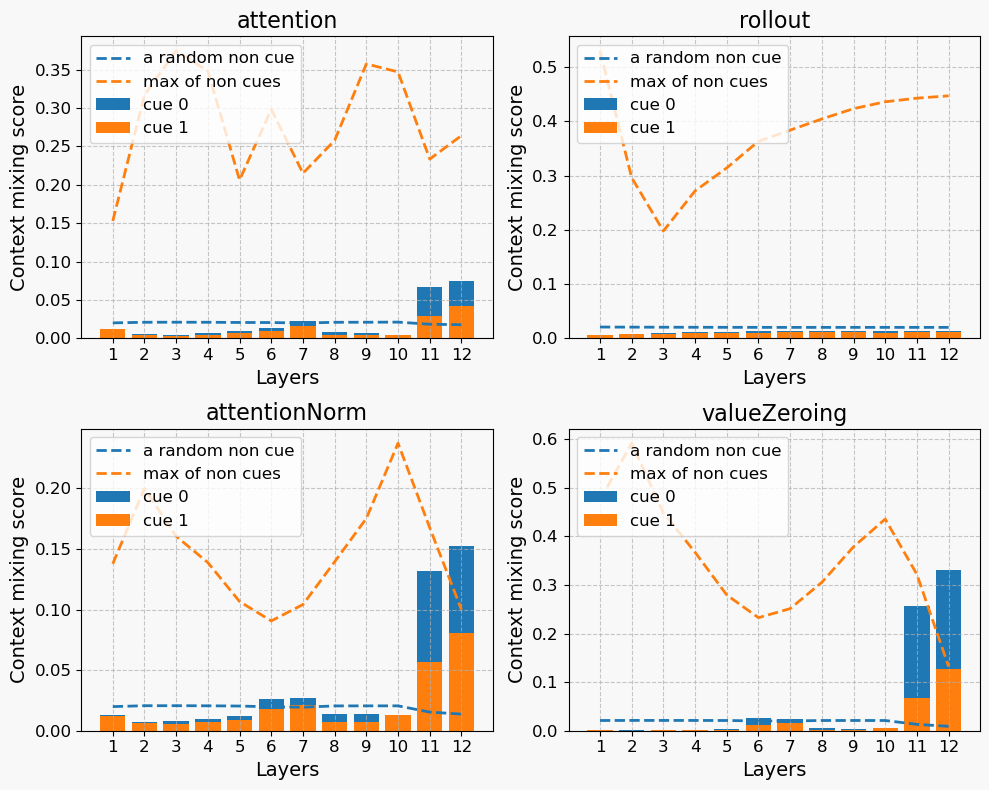

In [58]:
plot_cm(df_equal)

#### Examples with 3 cues

In [2]:
df = pd.read_pickle('results/roberta-base_gender_agreement_3.pkl')
print('MASKED TEXT: ', df.iloc[0]['masked_text'])
print('CUE WORDS: ', df.iloc[0]['cue_words'])
print('TARGET WORD: ', df.iloc[0]['target_word'])
print('MODEL PREDICTION: ', df.iloc[0]['model_top1_prediction'])
print('DATAFRAME #ROWS: ', df.shape[0])

MASKED TEXT:  nerilie abram phd -lrb- born june 1977 -rrb- is an australian climate scientist . she holds an australian research council qeii fellowship and is on the faculty of the anu research school of earth sciences , australian national university , canberra , australia . <mask> areas of interest and expertise are in climate change and paleoclimatology , including the climate of antarctica , the indian ocean dipole , and impacts on the climate of australia .
CUE WORDS:  ['nerilie|0|7', 'abram|8|13', 'she|82|85']
TARGET WORD:  her
MODEL PREDICTION:   Her
DATAFRAME #ROWS:  934


In [3]:
# investigating examples with correct model prediction
equality_condition = (df['target_word'] == df['model_top1_prediction'].astype(str).str.lower()) | (' '+df['target_word'] == df['model_top1_prediction'].astype(str).str.lower())
df_equal = df.loc[equality_condition]
print('DATAFRAME #ROWS: ', df_equal.shape[0])
print('ACCURACY: ', df_equal.shape[0]/df.shape[0] * 100, '%')

DATAFRAME #ROWS:  897
ACCURACY:  96.03854389721627 %


In [ ]:
# add cue_words cm and also mean and max cm of nonCue_words to the resulted dataframe
for cm in ['attention', 'rollout', 'attentionNorm', 'valueZeroing']:
    df_equal[f'{cm}_CueWordsCm_all_layers'] = df_equal.apply(
        lambda row: extract_cueWords_cm(row[f'{cm}_cm_all_layers'], row['cues_tokenIdxes']), 
        axis=1
    )

    df_equal[f'{cm}_nonCueWordsCm_mean_all_layers'] = df_equal.apply(
        lambda row: extract_nonCueWords_stats(row[f'{cm}_cm_all_layers'], row['cues_tokenIdxes'], 'mean'), 
        axis=1
    )

    df_equal[f'{cm}_nonCueWordsCm_max_all_layers'] = df_equal.apply(
        lambda row: extract_nonCueWords_stats(row[f'{cm}_cm_all_layers'], row['cues_tokenIdxes'], 'max'), 
        axis=1
    )

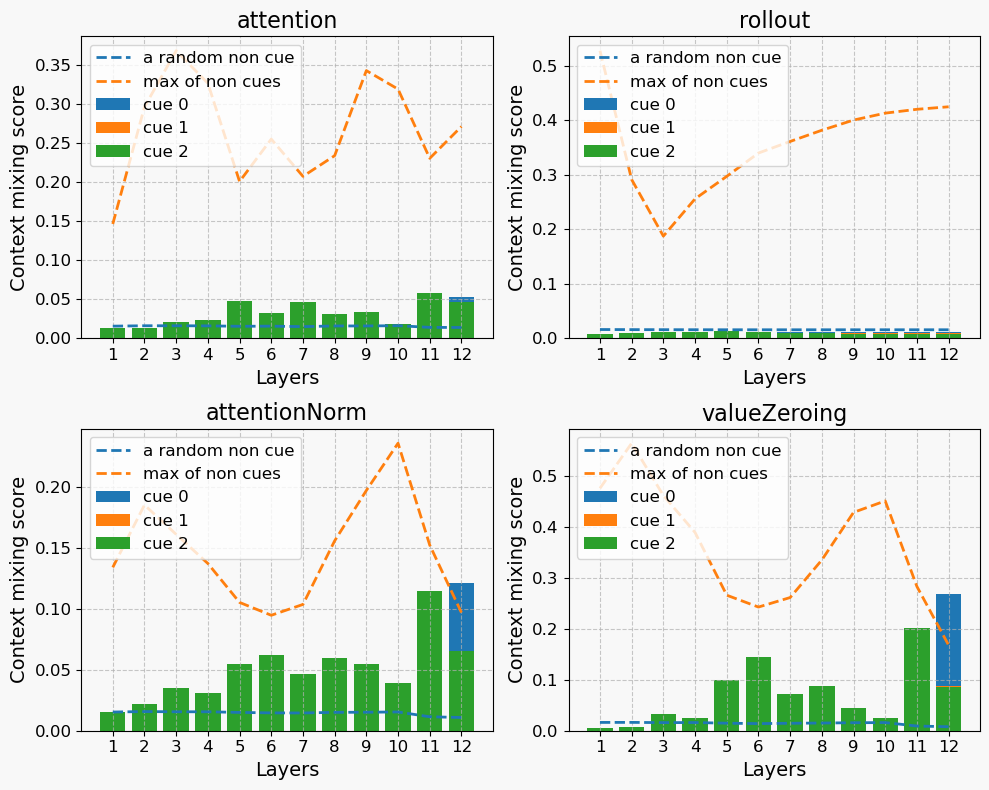

In [12]:
plot_cm(df_equal)

#### Examples with 10 cues

In [16]:
df = pd.read_pickle('results/roberta-base_gender_agreement_10.pkl')
print('MASKED TEXT: ', df.iloc[0]['masked_text'])
print('CUE WORDS: ', df.iloc[0]['cue_words'])
print('TARGET WORD: ', df.iloc[0]['target_word'])
print('MODEL PREDICTION: ', df.iloc[0]['model_top1_prediction'])
print('DATAFRAME #ROWS: ', df.shape[0])

MASKED TEXT:  eric braff -lrb- born november 12 , 1980 -rrb- is a canadian ice hockey defenceman who is currently a free agent . braff spent four seasons in the ontario hockey league for the kingston frontenacs before moving to college , spending four seasons with st. francis xavier university . he turned pro in 2005 with the pensacola ice pilots of the echl . after one season , braff moved to the uk , signing with the basingstoke bison . in the 2007-08 season , braff was the team 's highest scoring defenceman with 33 points -lrb- 6g and 27 a -rrb- . braff remained with the bison until 2009 when the bison withdraw from the elite league to play in the english premier ice hockey league . braff then moved to hc eppan pirates in italy before moving to the clarenville caribous . eric braff received an astonishing gawk from <mask> peers after eating 44 individual pieces of sushi at 168 sushi in ottawa , canada .
CUE WORDS:  ['eric|0|4', 'braff|5|10', 'braff|115|120', 'he|283|285', 'braff|368

In [17]:
# investigating examples with correct model prediction
equality_condition = (df['target_word'] == df['model_top1_prediction'].astype(str).str.lower()) | (' '+df['target_word'] == df['model_top1_prediction'].astype(str).str.lower())
df_equal = df.loc[equality_condition]
print('DATAFRAME #ROWS: ', df_equal.shape[0])
print('ACCURACY: ', df_equal.shape[0]/df.shape[0] * 100, '%')

DATAFRAME #ROWS:  49
ACCURACY:  96.07843137254902 %


In [ ]:
# add cue_words cm and also mean and max cm of nonCue_words to the resulted dataframe
for cm in ['attention', 'rollout', 'attentionNorm', 'valueZeroing']:
    df_equal[f'{cm}_CueWordsCm_all_layers'] = df_equal.apply(
        lambda row: extract_cueWords_cm(row[f'{cm}_cm_all_layers'], row['cues_tokenIdxes']), 
        axis=1
    )

    df_equal[f'{cm}_nonCueWordsCm_mean_all_layers'] = df_equal.apply(
        lambda row: extract_nonCueWords_stats(row[f'{cm}_cm_all_layers'], row['cues_tokenIdxes'], 'mean'), 
        axis=1
    )

    df_equal[f'{cm}_nonCueWordsCm_max_all_layers'] = df_equal.apply(
        lambda row: extract_nonCueWords_stats(row[f'{cm}_cm_all_layers'], row['cues_tokenIdxes'], 'max'), 
        axis=1
    )

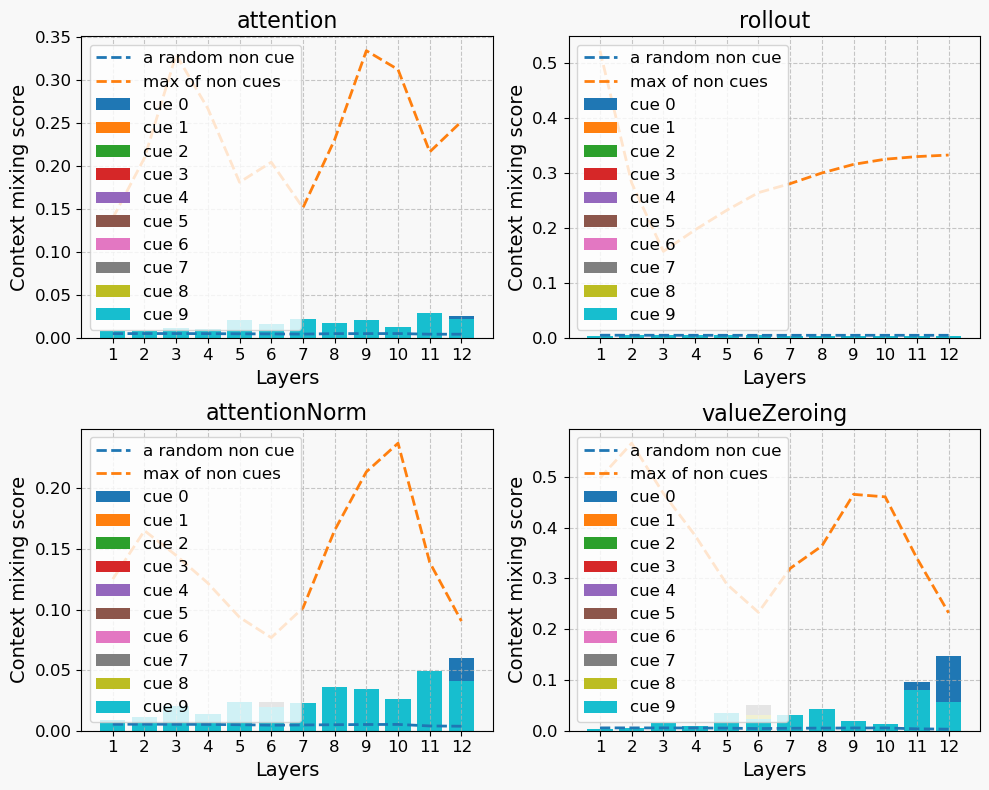

In [19]:
plot_cm(df_equal)

### with fine-tuning

#### Examples with 2 cues

In [21]:
df = pd.read_pickle('results/finetuned-roberta_gender_agreement_2.pkl')
print('MASKED TEXT: ', df.iloc[0]['masked_text'])
print('CUE WORDS: ', df.iloc[0]['cue_words'])
print('TARGET WORD: ', df.iloc[0]['target_word'])
print('MODEL PREDICTION: ', df.iloc[0]['model_top1_prediction'])
print('DATAFRAME #ROWS: ', df.shape[0])

MASKED TEXT:  arnold chernushevich -lrb- , 15 january 1933 -- 2 september 1991 -rrb- was a soviet olympic fencer . <mask> won a bronze medal in the team épée event at the 1960 summer olympics .
CUE WORDS:  ['arnold|0|6', 'chernushevich|7|20']
TARGET WORD:  he
MODEL PREDICTION:   He
DATAFRAME #ROWS:  1677


In [22]:
# investigating examples with correct model prediction
equality_condition = (df['target_word'] == df['model_top1_prediction'].astype(str).str.lower()) | (' '+df['target_word'] == df['model_top1_prediction'].astype(str).str.lower())
df_equal = df.loc[equality_condition]
print('DATAFRAME #ROWS: ', df_equal.shape[0])
print('ACCURACY: ', df_equal.shape[0]/df.shape[0] * 100, '%')

DATAFRAME #ROWS:  1597
ACCURACY:  95.22957662492546 %


In [ ]:
# add cue_words cm and also mean and max cm of nonCue_words to the resulted dataframe
for cm in ['attention', 'rollout', 'attentionNorm', 'valueZeroing']:
    df_equal[f'{cm}_CueWordsCm_all_layers'] = df_equal.apply(
        lambda row: extract_cueWords_cm(row[f'{cm}_cm_all_layers'], row['cues_tokenIdxes']), 
        axis=1
    )

    df_equal[f'{cm}_nonCueWordsCm_mean_all_layers'] = df_equal.apply(
        lambda row: extract_nonCueWords_stats(row[f'{cm}_cm_all_layers'], row['cues_tokenIdxes'], 'mean'), 
        axis=1
    )

    df_equal[f'{cm}_nonCueWordsCm_max_all_layers'] = df_equal.apply(
        lambda row: extract_nonCueWords_stats(row[f'{cm}_cm_all_layers'], row['cues_tokenIdxes'], 'max'), 
        axis=1
    )

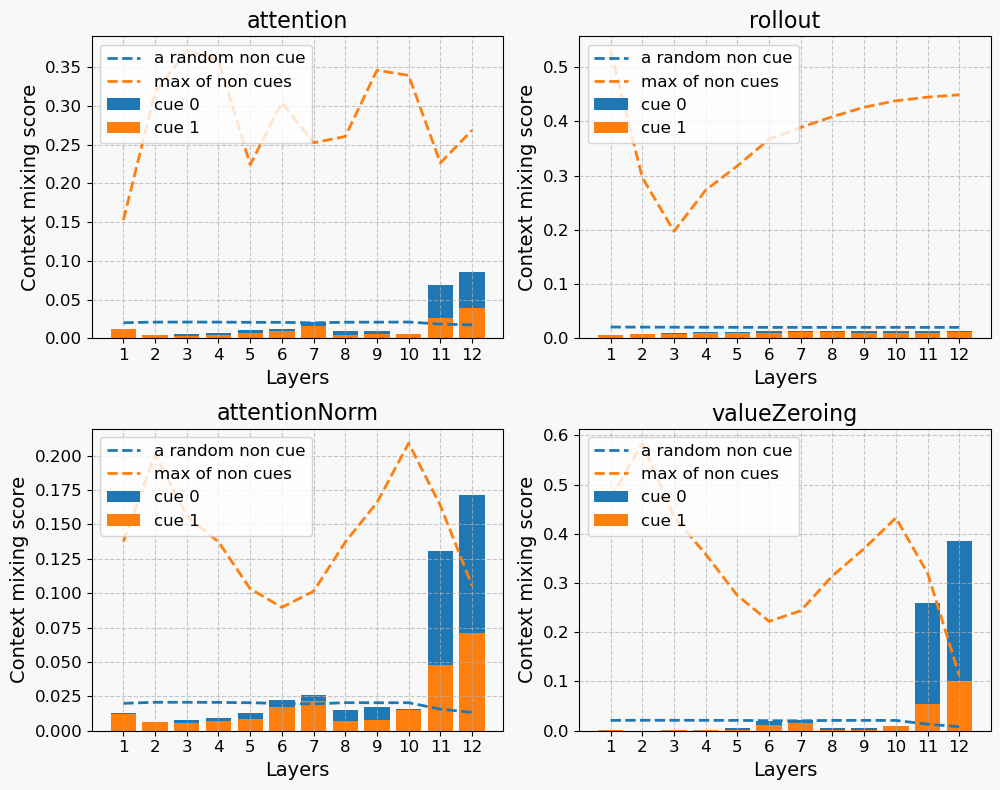

In [24]:
plot_cm(df_equal)

#### Examples with 3 cues

In [25]:
df = pd.read_pickle('results/finetuned-roberta_gender_agreement_3.pkl')
print('MASKED TEXT: ', df.iloc[0]['masked_text'])
print('CUE WORDS: ', df.iloc[0]['cue_words'])
print('TARGET WORD: ', df.iloc[0]['target_word'])
print('MODEL PREDICTION: ', df.iloc[0]['model_top1_prediction'])
print('DATAFRAME #ROWS: ', df.shape[0])

MASKED TEXT:  nerilie abram phd -lrb- born june 1977 -rrb- is an australian climate scientist . she holds an australian research council qeii fellowship and is on the faculty of the anu research school of earth sciences , australian national university , canberra , australia . <mask> areas of interest and expertise are in climate change and paleoclimatology , including the climate of antarctica , the indian ocean dipole , and impacts on the climate of australia .
CUE WORDS:  ['nerilie|0|7', 'abram|8|13', 'she|82|85']
TARGET WORD:  her
MODEL PREDICTION:   Her
DATAFRAME #ROWS:  934


In [26]:
# investigating examples with correct model prediction
equality_condition = (df['target_word'] == df['model_top1_prediction'].astype(str).str.lower()) | (' '+df['target_word'] == df['model_top1_prediction'].astype(str).str.lower())
df_equal = df.loc[equality_condition]
print('DATAFRAME #ROWS: ', df_equal.shape[0])
print('ACCURACY: ', df_equal.shape[0]/df.shape[0] * 100, '%')

DATAFRAME #ROWS:  903
ACCURACY:  96.68094218415418 %


In [ ]:
# add cue_words cm and also mean and max cm of nonCue_words to the resulted dataframe
for cm in ['attention', 'rollout', 'attentionNorm', 'valueZeroing']:
    df_equal[f'{cm}_CueWordsCm_all_layers'] = df_equal.apply(
        lambda row: extract_cueWords_cm(row[f'{cm}_cm_all_layers'], row['cues_tokenIdxes']), 
        axis=1
    )

    df_equal[f'{cm}_nonCueWordsCm_mean_all_layers'] = df_equal.apply(
        lambda row: extract_nonCueWords_stats(row[f'{cm}_cm_all_layers'], row['cues_tokenIdxes'], 'mean'), 
        axis=1
    )

    df_equal[f'{cm}_nonCueWordsCm_max_all_layers'] = df_equal.apply(
        lambda row: extract_nonCueWords_stats(row[f'{cm}_cm_all_layers'], row['cues_tokenIdxes'], 'max'), 
        axis=1
    )

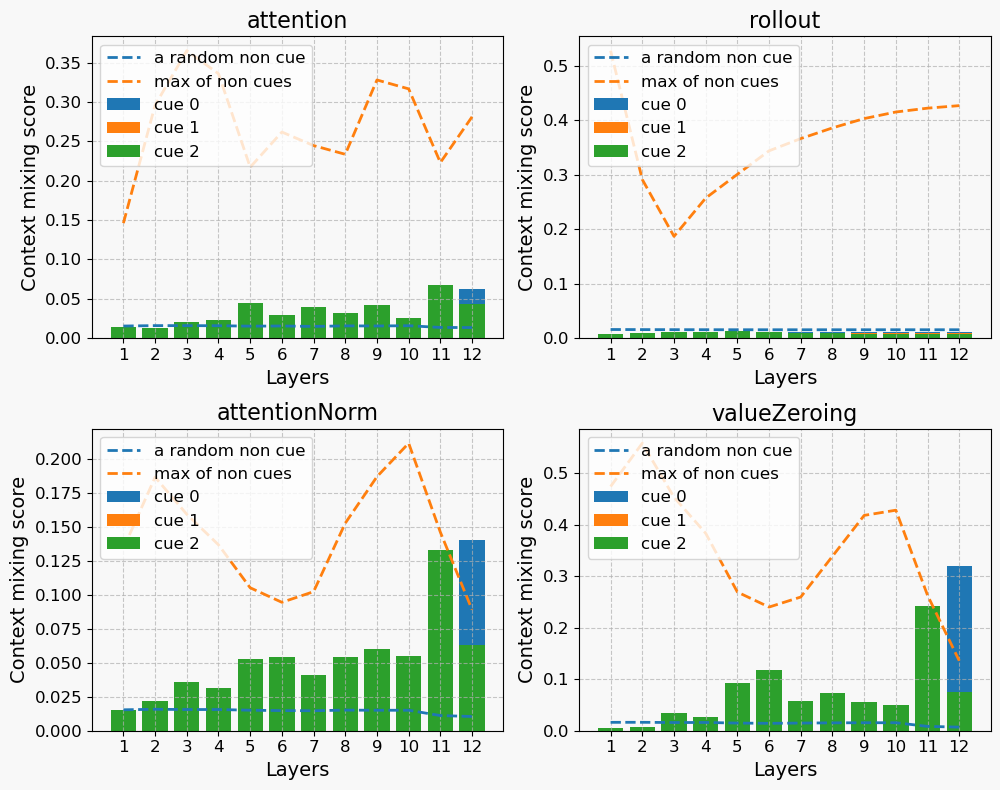

In [28]:
plot_cm(df_equal)

#### Examples with 10 cues

In [29]:
df = pd.read_pickle('results/finetuned-roberta_gender_agreement_10.pkl')
print('MASKED TEXT: ', df.iloc[0]['masked_text'])
print('CUE WORDS: ', df.iloc[0]['cue_words'])
print('TARGET WORD: ', df.iloc[0]['target_word'])
print('MODEL PREDICTION: ', df.iloc[0]['model_top1_prediction'])
print('DATAFRAME #ROWS: ', df.shape[0])

MASKED TEXT:  eric braff -lrb- born november 12 , 1980 -rrb- is a canadian ice hockey defenceman who is currently a free agent . braff spent four seasons in the ontario hockey league for the kingston frontenacs before moving to college , spending four seasons with st. francis xavier university . he turned pro in 2005 with the pensacola ice pilots of the echl . after one season , braff moved to the uk , signing with the basingstoke bison . in the 2007-08 season , braff was the team 's highest scoring defenceman with 33 points -lrb- 6g and 27 a -rrb- . braff remained with the bison until 2009 when the bison withdraw from the elite league to play in the english premier ice hockey league . braff then moved to hc eppan pirates in italy before moving to the clarenville caribous . eric braff received an astonishing gawk from <mask> peers after eating 44 individual pieces of sushi at 168 sushi in ottawa , canada .
CUE WORDS:  ['eric|0|4', 'braff|5|10', 'braff|115|120', 'he|283|285', 'braff|368

In [30]:
# investigating examples with correct model prediction
equality_condition = (df['target_word'] == df['model_top1_prediction'].astype(str).str.lower()) | (' '+df['target_word'] == df['model_top1_prediction'].astype(str).str.lower())
df_equal = df.loc[equality_condition]
print('DATAFRAME #ROWS: ', df_equal.shape[0])
print('ACCURACY: ', df_equal.shape[0]/df.shape[0] * 100, '%')

DATAFRAME #ROWS:  49
ACCURACY:  96.07843137254902 %


In [ ]:
# add cue_words cm and also mean and max cm of nonCue_words to the resulted dataframe
for cm in ['attention', 'rollout', 'attentionNorm', 'valueZeroing']:
    df_equal[f'{cm}_CueWordsCm_all_layers'] = df_equal.apply(
        lambda row: extract_cueWords_cm(row[f'{cm}_cm_all_layers'], row['cues_tokenIdxes']), 
        axis=1
    )

    df_equal[f'{cm}_nonCueWordsCm_mean_all_layers'] = df_equal.apply(
        lambda row: extract_nonCueWords_stats(row[f'{cm}_cm_all_layers'], row['cues_tokenIdxes'], 'mean'), 
        axis=1
    )

    df_equal[f'{cm}_nonCueWordsCm_max_all_layers'] = df_equal.apply(
        lambda row: extract_nonCueWords_stats(row[f'{cm}_cm_all_layers'], row['cues_tokenIdxes'], 'max'), 
        axis=1
    )

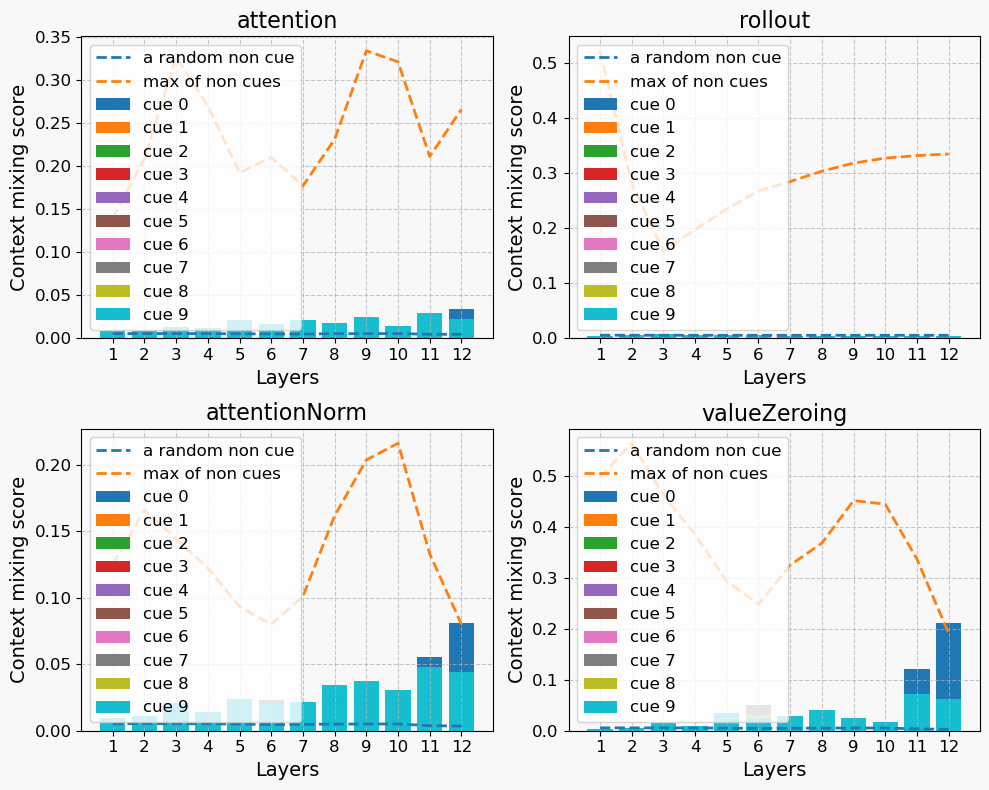

In [32]:
plot_cm(df_equal)

## gemma

### without fine-tuning

#### Examples with 2 cues

In [33]:
df = pd.read_pickle('results/gemma-2b_gender_agreement_2.pkl')
print('MASKED TEXT: ', df.iloc[0]['masked_text'])
print('CUE WORDS: ', df.iloc[0]['cue_words'])
print('TARGET WORD: ', df.iloc[0]['target_word'])
print('MODEL PREDICTION: ', df.iloc[0]['model_top1_prediction'])
print('DATAFRAME #ROWS: ', df.shape[0])

MASKED TEXT:  arnold chernushevich -lrb- , 15 january 1933 -- 2 september 1991 -rrb- was a soviet olympic fencer .
CUE WORDS:  ['arnold|0|6', 'chernushevich|7|20']
TARGET WORD:  he
MODEL PREDICTION:   he
DATAFRAME #ROWS:  1677


In [34]:
# investigating examples with correct model prediction
equality_condition = (df['target_word'] == df['model_top1_prediction'].astype(str).str.lower()) | (' '+df['target_word'] == df['model_top1_prediction'].astype(str).str.lower())
df_equal = df.loc[equality_condition]
print('DATAFRAME #ROWS: ', df_equal.shape[0])
print('ACCURACY: ', df_equal.shape[0]/df.shape[0] * 100, '%')

DATAFRAME #ROWS:  1098
ACCURACY:  65.47406082289802 %


In [ ]:
# add cue_words cm and also mean and max cm of nonCue_words to the resulted dataframe
for cm in ['attention', 'rollout', 'valueZeroing']:
    df_equal[f'{cm}_CueWordsCm_all_layers'] = df_equal.apply(
        lambda row: extract_cueWords_cm(row[f'{cm}_cm_all_layers'], row['cues_tokenIdxes']), 
        axis=1
    )

    df_equal[f'{cm}_nonCueWordsCm_mean_all_layers'] = df_equal.apply(
        lambda row: extract_nonCueWords_stats(row[f'{cm}_cm_all_layers'], row['cues_tokenIdxes'], 'mean'), 
        axis=1
    )

    df_equal[f'{cm}_nonCueWordsCm_max_all_layers'] = df_equal.apply(
        lambda row: extract_nonCueWords_stats(row[f'{cm}_cm_all_layers'], row['cues_tokenIdxes'], 'max'), 
        axis=1
    )

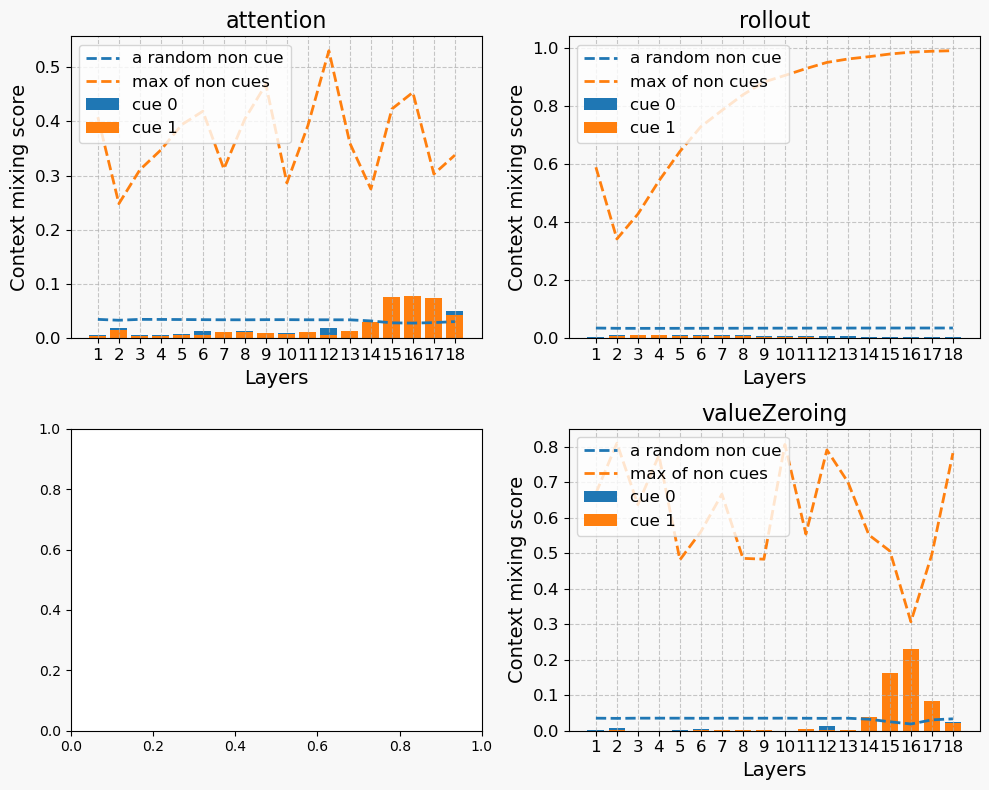

In [37]:
plot_cm(df_equal)

#### Examples with 3 cues

In [42]:
df = pd.read_pickle('results/gemma-2b_gender_agreement_3.pkl')
print('MASKED TEXT: ', df.iloc[0]['masked_text'])
print('CUE WORDS: ', df.iloc[0]['cue_words'])
print('TARGET WORD: ', df.iloc[0]['target_word'])
print('MODEL PREDICTION: ', df.iloc[0]['model_top1_prediction'])
print('DATAFRAME #ROWS: ', df.shape[0])

MASKED TEXT:  nerilie abram phd -lrb- born june 1977 -rrb- is an australian climate scientist . she holds an australian research council qeii fellowship and is on the faculty of the anu research school of earth sciences , australian national university , canberra , australia .
CUE WORDS:  ['nerilie|0|7', 'abram|8|13', 'she|82|85']
TARGET WORD:  her
MODEL PREDICTION:   australia
DATAFRAME #ROWS:  934


In [44]:
# investigating examples with correct model prediction
equality_condition = (df['target_word'] == df['model_top1_prediction'].astype(str).str.lower()) | (' '+df['target_word'] == df['model_top1_prediction'].astype(str).str.lower())
df_equal = df.loc[equality_condition]
print('DATAFRAME #ROWS: ', df_equal.shape[0])
print('ACCURACY: ', df_equal.shape[0]/df.shape[0] * 100, '%')

DATAFRAME #ROWS:  468
ACCURACY:  50.107066381156315 %


In [ ]:
# add cue_words cm and also mean and max cm of nonCue_words to the resulted dataframe
for cm in ['attention', 'rollout', 'valueZeroing']:
    df_equal[f'{cm}_CueWordsCm_all_layers'] = df_equal.apply(
        lambda row: extract_cueWords_cm(row[f'{cm}_cm_all_layers'], row['cues_tokenIdxes']), 
        axis=1
    )

    df_equal[f'{cm}_nonCueWordsCm_mean_all_layers'] = df_equal.apply(
        lambda row: extract_nonCueWords_stats(row[f'{cm}_cm_all_layers'], row['cues_tokenIdxes'], 'mean'), 
        axis=1
    )

    df_equal[f'{cm}_nonCueWordsCm_max_all_layers'] = df_equal.apply(
        lambda row: extract_nonCueWords_stats(row[f'{cm}_cm_all_layers'], row['cues_tokenIdxes'], 'max'), 
        axis=1
    )

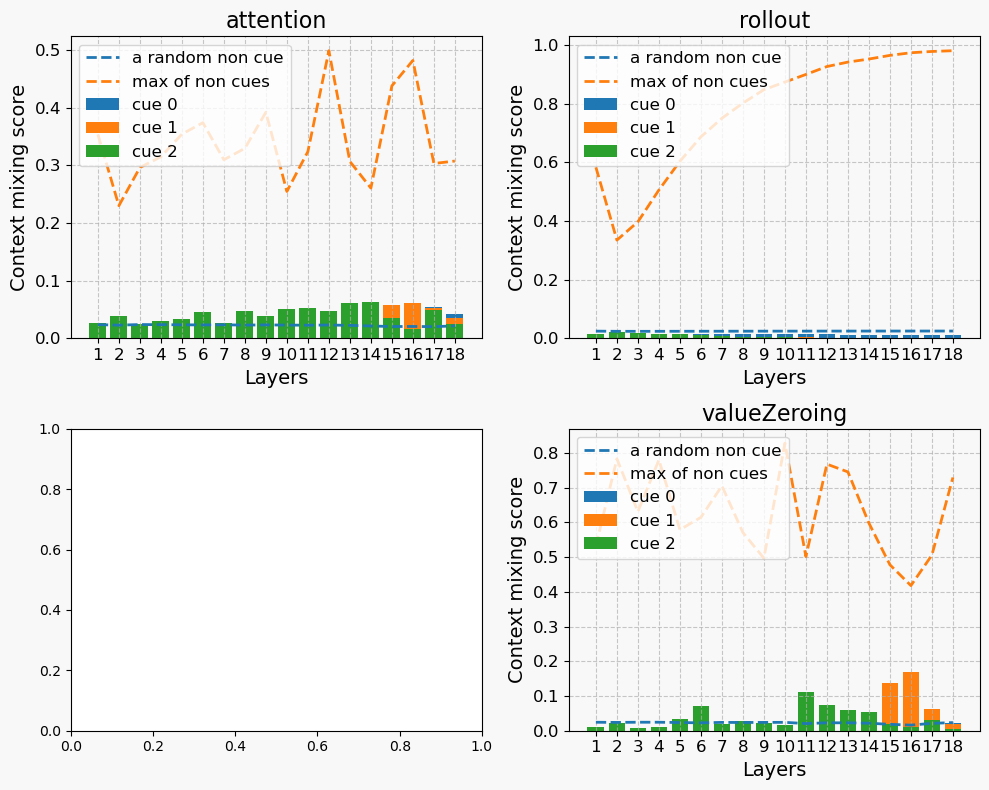

In [46]:
plot_cm(df_equal)

#### Examples with 10 cues

In [47]:
df = pd.read_pickle('results/gemma-2b_gender_agreement_10.pkl')
print('MASKED TEXT: ', df.iloc[0]['masked_text'])
print('CUE WORDS: ', df.iloc[0]['cue_words'])
print('TARGET WORD: ', df.iloc[0]['target_word'])
print('MODEL PREDICTION: ', df.iloc[0]['model_top1_prediction'])
print('DATAFRAME #ROWS: ', df.shape[0])

MASKED TEXT:  eric braff -lrb- born november 12 , 1980 -rrb- is a canadian ice hockey defenceman who is currently a free agent . braff spent four seasons in the ontario hockey league for the kingston frontenacs before moving to college , spending four seasons with st. francis xavier university . he turned pro in 2005 with the pensacola ice pilots of the echl . after one season , braff moved to the uk , signing with the basingstoke bison . in the 2007-08 season , braff was the team 's highest scoring defenceman with 33 points -lrb- 6g and 27 a -rrb- . braff remained with the bison until 2009 when the bison withdraw from the elite league to play in the english premier ice hockey league . braff then moved to hc eppan pirates in italy before moving to the clarenville caribous . eric braff received an astonishing gawk from
CUE WORDS:  ['eric|0|4', 'braff|5|10', 'braff|115|120', 'he|283|285', 'braff|368|373', 'braff|453|458', 'braff|543|548', 'braff|681|686', 'eric|771|775', 'braff|776|781']

In [48]:
# investigating examples with correct model prediction
equality_condition = (df['target_word'] == df['model_top1_prediction'].astype(str).str.lower()) | (' '+df['target_word'] == df['model_top1_prediction'].astype(str).str.lower())
df_equal = df.loc[equality_condition]
print('DATAFRAME #ROWS: ', df_equal.shape[0])
print('ACCURACY: ', df_equal.shape[0]/df.shape[0] * 100, '%')

DATAFRAME #ROWS:  28
ACCURACY:  54.90196078431373 %


In [ ]:
# add cue_words cm and also mean and max cm of nonCue_words to the resulted dataframe
for cm in ['attention', 'rollout', 'valueZeroing']:
    df_equal[f'{cm}_CueWordsCm_all_layers'] = df_equal.apply(
        lambda row: extract_cueWords_cm(row[f'{cm}_cm_all_layers'], row['cues_tokenIdxes']), 
        axis=1
    )

    df_equal[f'{cm}_nonCueWordsCm_mean_all_layers'] = df_equal.apply(
        lambda row: extract_nonCueWords_stats(row[f'{cm}_cm_all_layers'], row['cues_tokenIdxes'], 'mean'), 
        axis=1
    )

    df_equal[f'{cm}_nonCueWordsCm_max_all_layers'] = df_equal.apply(
        lambda row: extract_nonCueWords_stats(row[f'{cm}_cm_all_layers'], row['cues_tokenIdxes'], 'max'), 
        axis=1
    )

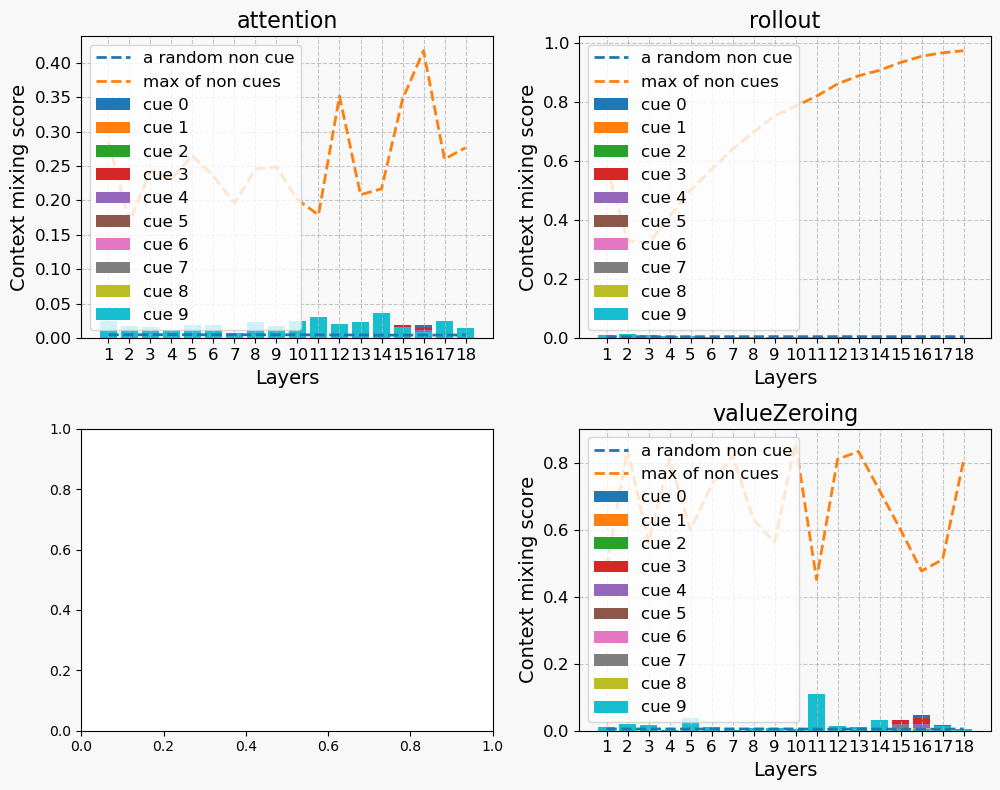

In [50]:
plot_cm(df_equal)